# Proyek Analisis Data: E-Commerce Public
- **Nama:** Pangestika Maharani Putri
- **Email:** pangestikappt@gmail.cm
- **ID Dicoding:** pangestikamp

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan total banyaknya peminjam sepeda berdasarkan musim?
- Bagaimana perbandingan total banyaknya peminjam sepeda yang dilihat berdasarkan masing-masing tahun dan musim?
- Apakah terdapat pola tertentu yang dimiliki oleh total banyaknya peminjam sepeda?
- Bagaimana hubungan antara temperatur dengan total banyaknya peminjam sepeda?
- Bagaimana hubungan anatara apparent temperatur dengan total banyaknya peminjam sepeda?
- Bagaimana hubungan antara humidity dengan total banyaknya peminjam sepeda?
- Bagaimana hubungan antara windspeed dengan total banyaknya peminjam sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mengimpor data dengan nama 'day.csv', kemudian diberi nama 'day_bikedata'

In [2]:
day_bikedata = pd.read_csv('/content/day.csv')
day_bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Informasi banyaknya kolom, banyaknya data, nama setiap kolom, banyaknya missing value, dan tipe data masing-masing kolom yang diperoleh dari data frame "*day_bikedata*" :

In [3]:
day_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengecek apakah terdapat data yang memiliki *missing value*

In [4]:
day_bikedata.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



> Hasil menunjukkan bahwa tidak ada data yang memiliki missing value



Mengecek apakah terdapat *duplicate* pada data

In [5]:
duplicate = day_bikedata.duplicated().sum()
print("duplicate:", duplicate)

duplicate: 0


Mengecek apakah terdapat *outlier* dari variabel "temperatur"

In [6]:
q25, q75 = np.percentile(day_bikedata['temp'], 25), np.percentile(day_bikedata['temp'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

temp_outliers = [x for x in day_bikedata['temp'] if x < minimum or x > maximum]
print("Temp Outliers:", temp_outliers)



Temp Outliers: []


Mengecek apakah terdpat *outlier* dari variabel "apparent temperature"

In [7]:
q25, q75 = np.percentile(day_bikedata['atemp'], 25), np.percentile(day_bikedata['atemp'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

atemp_outliers = [x for x in day_bikedata['atemp'] if x < minimum or x > maximum]
print("ATemp Outliers:", atemp_outliers)


ATemp Outliers: []


Mengecek apakah terdapat *outlier* dari variabel "humidity"

In [8]:
q25, q75 = np.percentile(day_bikedata['hum'], 25), np.percentile(day_bikedata['hum'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

hum_outliers = [x for x in day_bikedata['hum'] if x < minimum or x > maximum]
print("Hum Outliers:", hum_outliers)


Hum Outliers: [0.187917, 0.0]


Mengecek apakah terdapat *outlier* dari variabel "windspeed"

In [9]:
q25, q75 = np.percentile(day_bikedata['windspeed'], 25), np.percentile(day_bikedata['windspeed'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

windspeed_outliers = [x for x in day_bikedata['windspeed'] if x < minimum or x > maximum]
print("Windspeed Outliers:", windspeed_outliers)


Windspeed Outliers: [0.417908, 0.507463, 0.385571, 0.388067, 0.422275, 0.415429, 0.409212, 0.421642, 0.441563, 0.4148, 0.386821, 0.398008, 0.407346]


### Cleaning Data

Berdasarkan hasil pengecekan outlier,terdapat dua variabel yang memiliki outlier yaitu humidity dan windspeed. Pada kasus ini outlier akan ditangani dengan mengganti nilai outlier dengan nilai mean (rata-rata)

- Humidity

In [10]:
Q1 = (day_bikedata['hum']).quantile(0.25)
Q3 = (day_bikedata['hum']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = day_bikedata['hum'] < minimum
kondisi_more_than = day_bikedata['hum'] > maximum

mean_hum = day_bikedata['hum'].mean()
day_bikedata.loc[kondisi_more_than, 'hum'] = mean_hum
day_bikedata.loc[kondisi_lower_than, 'hum'] = mean_hum

In [11]:
hum_outliers = [x for x in day_bikedata['hum'] if x < minimum or x > maximum]
print("Hum Outliers:", hum_outliers)

Hum Outliers: []


- Windspeed

In [12]:
Q1 = (day_bikedata['windspeed']).quantile(0.25)
Q3 = (day_bikedata['windspeed']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = day_bikedata['windspeed'] < minimum
kondisi_more_than = day_bikedata['windspeed'] > maximum

mean_WS = day_bikedata['windspeed'].mean()
day_bikedata.loc[kondisi_more_than, 'windspeed'] = mean_WS
day_bikedata.loc[kondisi_lower_than, 'windspeed'] = mean_WS

In [13]:
windspeed_outliers = [x for x in day_bikedata['windspeed'] if x < minimum or x > maximum]
print("Windspeed Outliers:", windspeed_outliers)

Windspeed Outliers: []


## Exploratory Data Analysis (EDA)

### Explore Day Bike Dataset

Mencari informasi count, mean, standard deviasi, quartile, nilai minimum dan maksimum dari variabel-variabel yang akan dianalisis dari data tersebut dengan menggunakan fungsi **desc()**

In [14]:
desc = day_bikedata[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()
print(desc)

             temp       atemp         hum   windspeed       casual  \
count  731.000000  731.000000  731.000000  731.000000   731.000000   
mean     0.495385    0.474354    0.629355    0.186465   848.176471   
std      0.183051    0.162961    0.139566    0.071151   686.622488   
min      0.059130    0.079070    0.254167    0.022392     2.000000   
25%      0.337083    0.337842    0.522291    0.134950   315.500000   
50%      0.498333    0.486733    0.627894    0.180975   713.000000   
75%      0.655417    0.608602    0.730209    0.229785  1096.000000   
max      0.861667    0.840896    0.972500    0.378108  3410.000000   

        registered          cnt  
count   731.000000   731.000000  
mean   3656.172367  4504.348837  
std    1560.256377  1937.211452  
min      20.000000    22.000000  
25%    2497.000000  3152.000000  
50%    3662.000000  4548.000000  
75%    4776.500000  5956.000000  
max    6946.000000  8714.000000  


Mengelompokkan nilai rata-rata dari variabel casual, registered, dan cnt(count) berdasarkan seasonnya

In [15]:
day_bikedata.groupby(by="season")['casual','registered','cnt'].mean()

<ipython-input-15-3ddb3cc29ec2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  day_bikedata.groupby(by="season")['casual','registered','cnt'].mean()


,casual,registered,cnt
season,,,
1,334.928177,2269.204420,2604.132597
2,1106.097826,3886.233696,4992.331522
3,1202.611702,4441.691489,5644.303191
4,729.112360,3999.050562,4728.162921




> Hasil menunjukkan bahwa rata-rata pengguna casual jika diurutkan dari yang tertinggi yiatu pada musim ke-3/fall, musim ke-2/summer, musim ke-4/winter, musim ke-1/spring. Selanjutnya ntuk rata-rata pengguna registered yaitu musim ke-3/fall, musim ke-4/winter, musim ke-2/summer, musim ke-1 spring. Urutan pada pengguna registered tersebut juga berlaku sama untuk total peminjam sepeda.


## Visualization & Explanatory Analysis

### Bagaimana perbandingan total banyaknya peminjam sepeda berdasarkan musim?

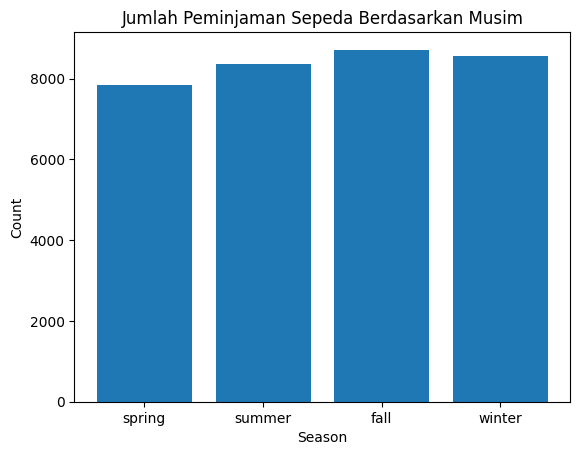

In [16]:
mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
day_bikedata['season'] = day_bikedata['season'].replace(mapping)
plt.bar(x= day_bikedata['season'], height= day_bikedata['cnt'])
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.show()


> Grafik menunjukkan bahwa peminjam sepeda terbanyak adalah pada saat musim gugur, kemudian disusul dengan musim dingin, musim panas, dan terakhir adalah musim semi.





### Bagaimana perbandingan total banyaknya peminjam sepeda yang dilihat berdasarkan masing-masing tahun dan musim?

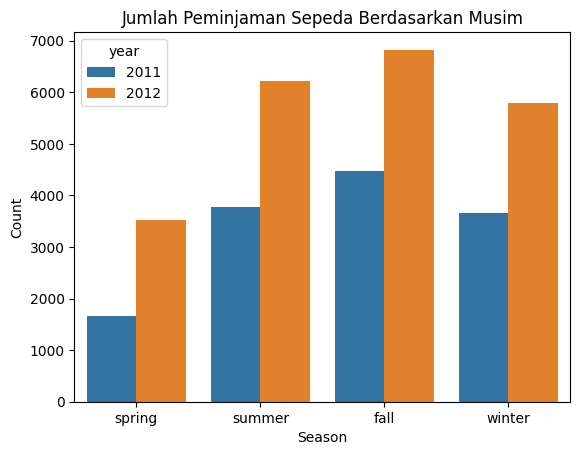

In [17]:
mapping = {0:'2011', 1:'2012'}
day_bikedata['yr'] = day_bikedata['yr'].replace(mapping)
sns.barplot(data=day_bikedata, x=day_bikedata['season'], y=day_bikedata['cnt'], hue=day_bikedata['yr'], errorbar=None)
plt.legend(title='year')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.show()



> Berdasarkan grafik yang dihasilkan, terlihat bahwa terjadi peningkatan yang signifikan pada tahun 2012 di semua musim. Pada musim gugur, baik tahun 2011 dan 2012 sama-sama memiliki nilai yang aling tinggi, sedangkan nilai terendahnya sama-sama berada di musim semi.



### Apakah terdapat pola tertentu yang dimiliki oleh total banyaknya peminjam sepeda?

<ipython-input-18-1d26a6d2dfc8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = day_bikedata.groupby(day_bikedata['dteday'].dt.to_period('M')).sum()


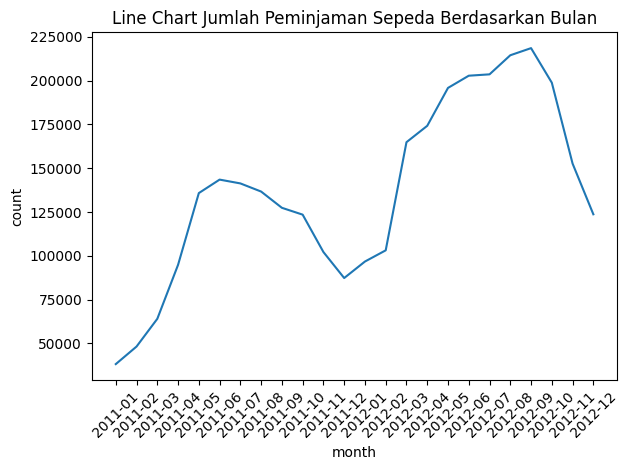

In [18]:
day_bikedata['dteday'] = pd.to_datetime(day_bikedata['dteday'])
monthly_data = day_bikedata.groupby(day_bikedata['dteday'].dt.to_period('M')).sum()
plt.plot(monthly_data.index.astype(str), monthly_data['cnt'])
plt.xlabel('month')
plt.ylabel('count')
plt.title('Line Chart Jumlah Peminjaman Sepeda Berdasarkan Bulan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



> Line chart memiliki pola yang sama meskipun terjadi peningkatan di tahun 2012.




### Bagaimana hubungan antara humidity dengan total banyaknya peminjam sepeda?

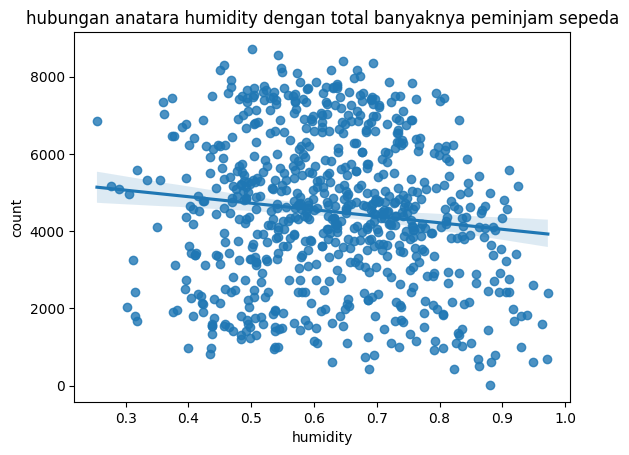

In [19]:
sns.regplot(x=day_bikedata['hum'], y=day_bikedata['cnt'])
plt.xlabel('humidity')
plt.ylabel('count')
plt.title('hubungan anatara humidity dengan total banyaknya peminjam sepeda')
plt.show()



> Garis yang terbentuk bergerak menurun namun hampir mendekati horizontal dan plot titik terlihat menyebar.





### Bagaimana hubungan anatara temperatur dengan total banyaknya peminjam sepeda?

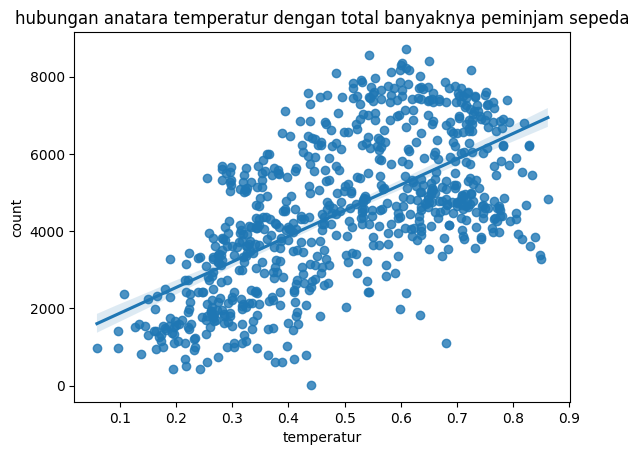

In [20]:
sns.regplot(x=day_bikedata['temp'], y=day_bikedata['cnt'])
plt.xlabel('temperatur')
plt.ylabel('count')
plt.title('hubungan anatara temperatur dengan total banyaknya peminjam sepeda')
plt.show()



> Garis yang terbentuk miring bergerak naik dan plot titik terlihat mengikuti kemiringan garis.



### Bagaimana hubungan anatara apparent temperatur dengan total banyaknya peminjam sepeda?

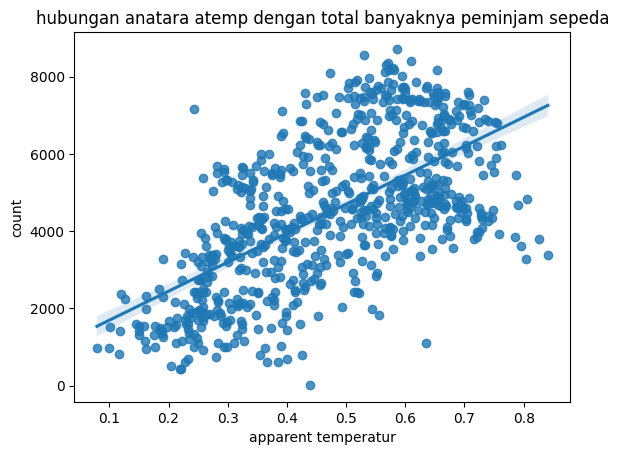

In [21]:
sns.regplot(x=day_bikedata['atemp'], y=day_bikedata['cnt'])
plt.xlabel('apparent temperatur')
plt.ylabel('count')
plt.title('hubungan anatara atemp dengan total banyaknya peminjam sepeda')
plt.show()



> Garis yang terbentuk miring bergerak naik dan plot titik terlihat mengikuti kemiringan garis.




### Bagaimana hubungan anatara windspeed dengan total banyaknya peminjam sepeda?

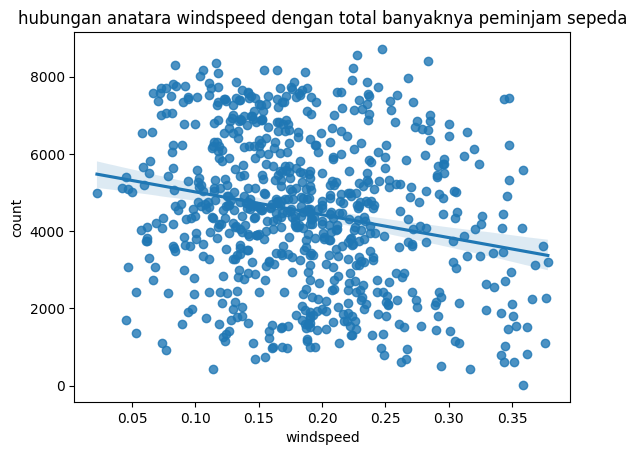

In [22]:
sns.regplot(x=day_bikedata['windspeed'], y=day_bikedata['cnt'])
plt.xlabel('windspeed')
plt.ylabel('count')
plt.title('hubungan anatara windspeed dengan total banyaknya peminjam sepeda')
plt.show()



> Garis yang terbentuk miring bergerak turun namun tidak terlalu signifikan dan plot titik terlihat masih cenderung terlalu menyebar.



## Conclusion


- Total banyaknya peminjam sepeda paling tinggi yaitu pada saat musim gugur, kemudian dengan selisih yang tipis disusul oleh musim dingin. Total pada musim dingin dan musim panas juga memiliki perbedaan yang tipis, membuat musim panas berada diurutan ketiga. Terakhir, total peminjam sepeda paling rendah diantara keempat musim tersebut yaitu pada musim semi.
- Total peminjam sepeda pada tahun 2011 mengalami peningkatan yang signifikan di tahun 2012 pada setiap musim. Urutan dari tertinggi ke terendah total peminjam sepeda berdasarkan musim yaitu musim gugur, musim dingin, musim panas, dan terakhir musim semi. Urutan tersebut berlaku untuk tahun 2011 dan 2012.
- Tahun 2011 dan 2012 memiliki pola yang sama, yaitu sama-sama membentuk kurva cembung. Meskipun terjadi peningkatan pada tahun 2012 namun pola grafiknya terlihat sama. Hal tersebut terjadi karena pembentukan kurva dipengaruhi oleh musim yang terjadi, dimana musim-musim tersebut akan berulang pada setiap tahunnya.
- Hubungan antara humidity dan total peminjam sepeda merupakan hubungan yang negatif, artinya bahwa ketika humidty rendah maka total peminjam sepeda tinggi/meingkat. Namun karena grafik yang terbentuk kemiringannya rendah dan hampir mendekati horizontal maka dapat dikatakan bahwa humidity tidak secara signifikan mempengaruhi total peminjaman sepeda.
- Hubungan antara temperatur dan total peminjam sepeda merupakan hubungan yang positif, artinya bahwa ketika temperatur rendah maka total peminjam sepeda juga rendah dan berlaku sebaliknya. Grafik yang terbentuk memiliki kemiringan yang signifikan dan titik-titiknya menyebar mendekati garis tersebut maka dapat dikatakan bahwa temperatur secara signifikan mempengaruhi total peminjaman sepeda.
- Hubungan antara apparent temperatur dan total peminjam sepeda merupakan hubungan yang positif, artinya bahwa ketika temperatur rendah maka total peminjam sepeda juga rendah dan berlaku sebaliknya. Grafik yang terbentuk memiliki kemiringan yang signifikan dan titik-titiknya menyebar mendekati garis tersebut maka dapat dikatakan bahwa apparent temperatur secara signifikan mempengaruhi total peminjaman sepeda.
- Hubungan antara windspeed dan total peminjam sepeda merupakan hubungan yang negatif, artinya bahwa ketika windspeed rendah maka total peminjam sepeda tinggi/meingkat. Namun karena grafik yang terbentuk kemiringannya tidak terlalu signifikan dan titik-titiknya terlihat masih menyebar, maka dapat dikatakan bahwa windspeed kurang secara signifikan mempengaruhi total peminjaman sepeda.


In [23]:
day_bikedata.to_csv("day_bikedata.csv", index=False)